In [2]:
# Welcome to your new notebook
# Type here in the cell editor to add code!


StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 4, Finished, Available, Finished)

In [3]:
df = spark.read.format("csv").option("header","true").load("Files/netflix_titles.csv")
# df now is a Spark DataFrame containing CSV data from "Files/netflix_titles.csv".
display(df)

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 2cb31d69-62c4-48c2-a9a8-4d8b2ace8182)

In [4]:
df.printSchema()

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 6, Finished, Available, Finished)

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



In [5]:
df_pd = df.toPandas()
df_pd.head(10)

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 7, Finished, Available, Finished)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",None,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",None,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
df.count()

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 8, Finished, Available, Finished)

8809

# Nettoyage des données 

Le dataset utilisé comporte 8809 lignes. Il faut adapter la méthode pour gérer les valeurs nulles en fonction de la taille de ce dernier et du type des différentes colonnes.

Il est préférable de ne pas s'orienter vers la suppression des lignes qui comportent des valeurs nulles comme le dataset ne fourni pas une quantité de données conséquente.  

On a pu voir ci-dessus que la majorité des colonnes sont de type "String" 

In [7]:
from pyspark.sql.functions import isnull,col, count, when, isnan

#df.na.drop(how='any').show()
df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 9, Finished, Available, Finished)

+-------+----+-----+--------+----+-------+----------+------------+------+--------+---------+-----------+
|show_id|type|title|director|cast|country|date_added|release_year|rating|duration|listed_in|description|
+-------+----+-----+--------+----+-------+----------+------------+------+--------+---------+-----------+
|      0|   1|    2|    2636| 826|    832|        13|           2|     6|       5|        3|          3|
+-------+----+-----+--------+----+-------+----------+------------+------+--------+---------+-----------+



On peut choisir de supprimer les lignes pour les colonnes "type", "title", "date_added", "realease_year", "rating", "duration", "listed_in", "description" car ça n'impactera pas l'analyse par la suite

Pour les colonnes "director","cast" et "country" : on va insérer la valeur "Unknown"

In [8]:
import pandas as pd
df_pd.dropna(subset=["type","title","date_added","release_year","rating","duration","listed_in","description"],inplace=True)
df_pd_filtered = df_pd.copy() #Il faut faire une copie du dataset car lorsqu'on utilise "inplace = True" sur une DataFrame,
# la sortie de l'opération est "NULL"
print(df_pd_filtered.isnull().sum())

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 10, Finished, Available, Finished)

show_id            0
type               0
title              0
director        2620
cast             824
country          828
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


On peut voir que les colonnes que les valeurs nulles ont été supprimées pour les colonnes qui en comptaient un faible nombre
Il faut désormais se concentrer sur les colonnes "director", "cast" et "country" 

In [9]:
#df_pd_filtered[['director','cast','country']].fillna('Unknown') 
df_pd_filtered.fillna({'director':'Unknown','cast':'Unknown','country':'Unknown'},inplace=True)
print(df_pd_filtered.isnull().sum())
df_pd_filtered.head(10)

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 11, Finished, Available, Finished)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [10]:
import pandas as pd 
def is_int(release_year):
    try:
        int(release_year)
        return True
    except ValueError:
        return False 

def clean_column(df,col_name):
    df_pd_filtered['is_convertible'] = df['release_year'].apply(is_int)
    new_df = df_pd_filtered[df_pd_filtered['is_convertible'] == True].copy()
    new_df.drop('is_convertible',axis=1,inplace=True)
    new_df['release_year'] = new_df['release_year'].astype("Int64")
    return new_df

df_clean = clean_column(df_pd_filtered,'release_year')
df_clean.info()


StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 12, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 8770 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8770 non-null   object
 1   type          8770 non-null   object
 2   title         8770 non-null   object
 3   director      8770 non-null   object
 4   cast          8770 non-null   object
 5   country       8770 non-null   object
 6   date_added    8770 non-null   object
 7   release_year  8770 non-null   Int64 
 8   rating        8770 non-null   object
 9   duration      8770 non-null   object
 10  listed_in     8770 non-null   object
 11  description   8770 non-null   object
dtypes: Int64(1), object(11)
memory usage: 899.3+ KB


In [11]:
df_clean.head(10)


StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 13, Finished, Available, Finished)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [12]:
#Fonction permettant de vérifier si les valeurs dans la colonne "date_added" sont bien des dates ou des valeurs invalides
def check_date_format(date_str):
    try:
        pd.to_datetime(date_str,format='%B %d, %Y')
        return True
    except ValueError:
        return False 

df_clean['date_valid'] = df_clean['date_added'].apply(check_date_format)
df_valid = df_clean[df_clean['date_valid'] == True].copy()
df_valid.drop(columns=['date_valid'],inplace=True)
df_valid['date_converted'] = pd.to_datetime(df_valid['date_added'],format='%B %d, %Y').dt.strftime('%Y-%m-%d')

df_valid.drop(columns=['date_added'],inplace=True)
df_valid.head(10)


StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 14, Finished, Available, Finished)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_converted
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24


# Visualisation des données 

Repartition des types de films 

StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 38, Finished, Available, Finished)

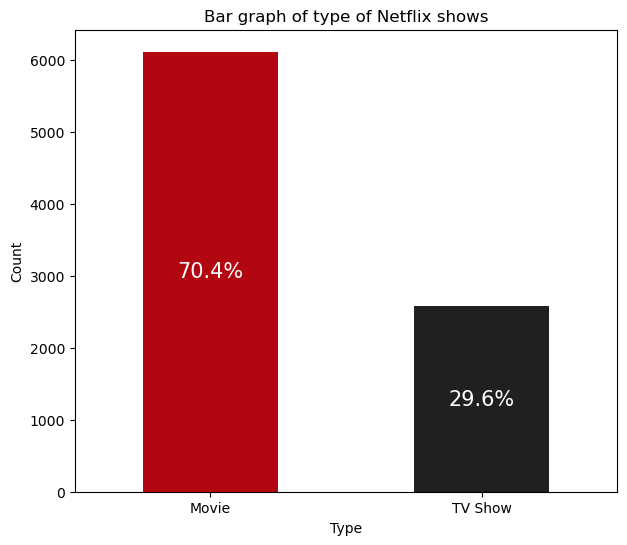

In [36]:
import matplotlib.pyplot  as plt
movies_count = df_valid['type'].value_counts()
plt.figure(figsize=(7,6))
ax = movies_count.plot(kind='bar',rot=0,color=['#b20710','#221f1f'])
ax.set_title("Bar graph of type of Netflix shows")
ax.set_xlabel("Type")
ax.set_ylabel("Count")

total = movies_count.sum()

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentage = (y_value / total) * 100 
    space = 1 
    label = f"{percentage:.1f}%"
    ax.annotate(label, 
                (x_value, y_value / 2), 
                xytext=(0, 0), 
                textcoords="offset points", 
                ha='center', 
                va='center',
                fontsize=15,
                color = 'white')

plt.show()
#df_valid['type'].value_counts().plot.bar(x='type',y='val',rot = 0)


StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 37, Finished, Available, Finished)

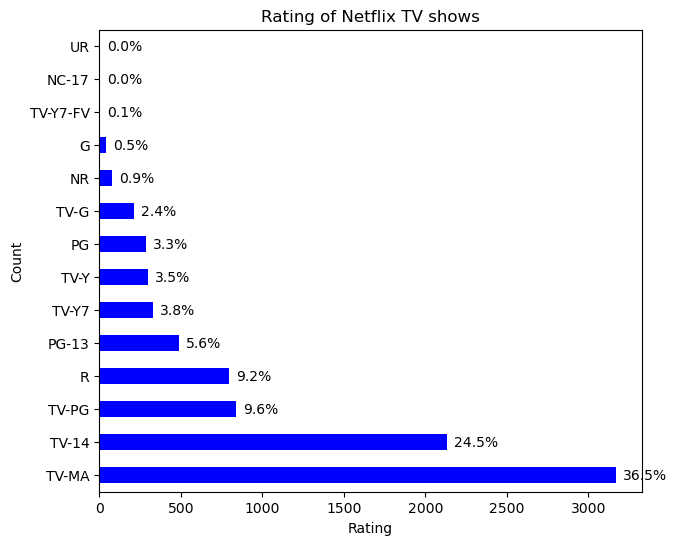

In [35]:
plt.figure(figsize=(7,6))
rating_count = df_valid['rating'].value_counts()
ax = rating_count.plot(kind='barh',rot=0,color='b')
ax.set_title("Rating of Netflix TV shows")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")

total = rating_count.sum()

# Ajout des annotations (pourcentages)
for rect in ax.patches:
    width = rect.get_width()  # Longueur de la barre
    y = rect.get_y() + rect.get_height() / 2  # Position verticale centrale de la barre
    percentage = (width / total) * 100  # Calcul du pourcentage
    
    # Création de l'étiquette (texte formaté)
    label = f"{percentage:.1f}%"
    
    # Affichage de l'étiquette au centre de la barre
    ax.annotate(label, 
                (width, y),  # Position du texte (au bout de la barre)
                xytext=(5, 0),  # Décalage du texte (5px à droite)
                textcoords="offset points", 
                ha='left', va='center', fontsize=10)

plt.show()




Le classement des films en fonction de l'âge n'est pas le même au Etats-unis et en France. Celui-ci dessus correspond à celui appliqué aux Etats-Unis

Voici à quoi correspondent chaque catégories : 

**Pour les enfants :**

TV-Y7 : Suitable for ages 7 and up

G : Suitable for General Audiences

TV-G : Suitable for General Audiences


PG : Parental Guidance suggested


TV-PG : Parental Guidance suggested


**Pour les adolescents** : 

PG-13 : Parents strongly cautioned. May be inappropriate for ages under 13.


TV-14 : Parents strongly cautioned. May not be suitable for ages under 14.


**Pour les adultes** : 

R : Restricted. May be inappropriate for ages under 17.


TV-MA : For Mature Audiences


NC-17 : Inappropriate for ages 17 and under

D'après le graphique, voici les proportions par catégorie :

 **- Adultes : 45.7%**

 **- Adolescents : 30.1%**

 **- Enfants : 23.2%**


En regardant les pourcentages totaux par catérogie, on peut voir que le contenu proposé par la plateforme Netflix semble être plus adapté à des utilisateurs adultes.

## Analyse par pays


StatementMeta(, 1db3ed8c-3dae-4b66-8a67-0bcabaf6d9fe, 64, Finished, Available, Finished)

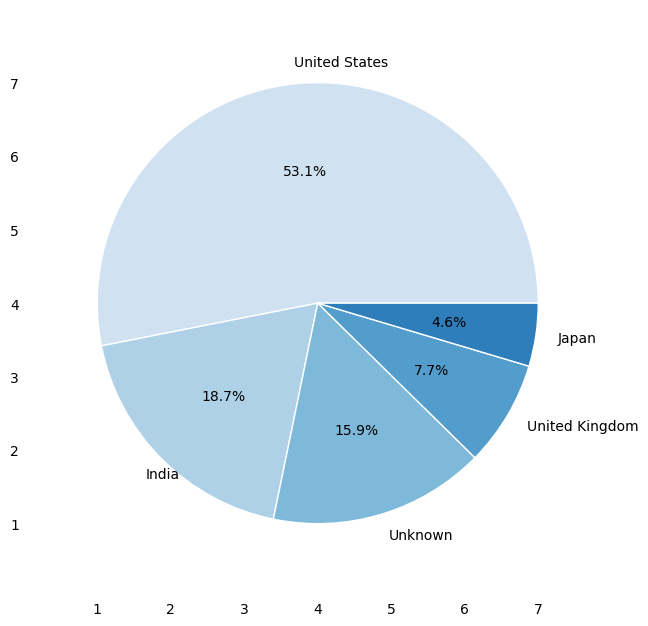

In [62]:
import numpy as np
plt.style.use('_mpl-gallery-nogrid')


# make data
country_count = df_valid['country'].value_counts()
top_5 = country_count.head(5)

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(top_5)))


fig, ax = plt.subplots(figsize=(10,6))
wedges, texts, autotexts = ax.pie(
    top_5, 
    labels=top_5.index,  # Labels = Noms des pays
    colors=colors, 
    radius=3, 
    center=(4, 4),
    wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
    autopct='%1.1f%%'  # Affiche les pourcentages
)

# Personnalisation des textes internes (en blanc pour une meilleure lisibilité)
for text in autotexts:
    text.set_color('black')

# Configuration des limites du graphique
ax.set(
    xlim=(0, 8), xticks=np.arange(1, 8),
    ylim=(0, 8), yticks=np.arange(1, 8)
)

# Ajout de la légende : Noms des 5 pays


plt.show()
